In [1]:
import datasets
import torch
import numpy as np
import matplotlib.pyplot as plt
from src.Indexer import ImageIndexer
from diffusers import StableDiffusionPipeline

/home/abetatos/Escritorio/Repositories/training/Stable diffusion based retrieval/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
n_items = 1000
reindex = False

# Inference
num_inference_steps = 30
guidance_scale = 7.5

In [3]:
def is_all_black(image):
    return np.all(np.array(image) == 0)

### Load the dataset
We will use the pokemon dataset which contains images of pokemons and short descriptions

In [4]:
pokedata = datasets.load_dataset("lambdalabs/pokemon-blip-captions")

### Indexing
Create an index with the dataset

In [5]:
Imi = ImageIndexer("tmp/index.index", pokedata, n_items=n_items, reindex=reindex)

### Inference
Load the model and do an inference for each description. 

In [6]:
model_path = "sd-pokemon-model-lora"
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)
pipe.unet.load_attn_procs(model_path)
pipe.to("cuda")
pass

Loading pipeline components...:  57%|███████████████████████████████████████████▍                                | 4/7 [00:00<00:00,  7.85it/s]`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
Loading pipeline components...: 100%|████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.21it/s]


a drawing of a green pokemon with red eyes


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 56.02it/s]


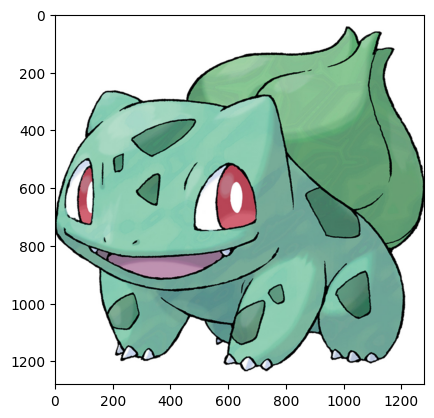

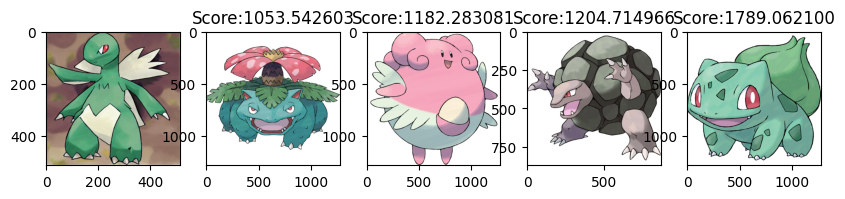

a green and yellow toy with a red nose


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 60.89it/s]


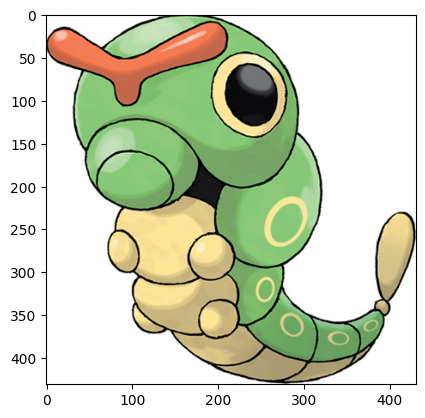

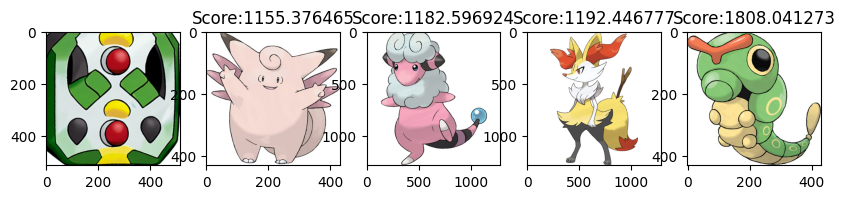

a red and white ball with an angry look on its face


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 58.18it/s]


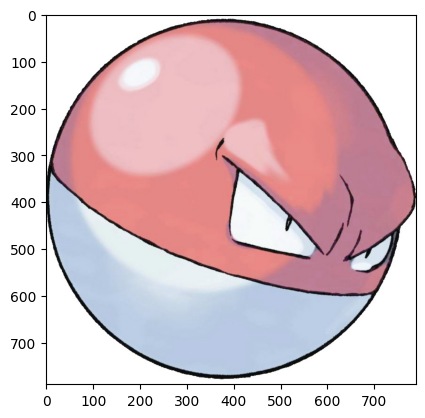

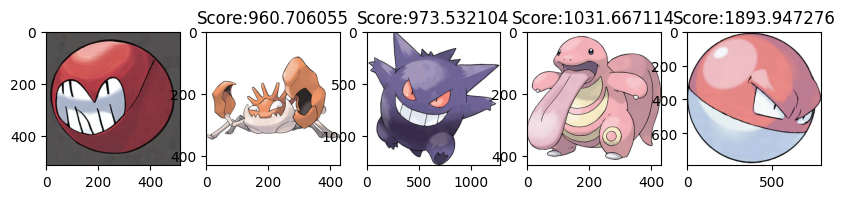

a cartoon ball with a smile on it's face


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 58.04it/s]


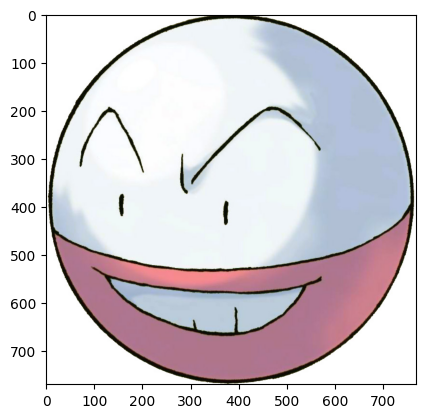

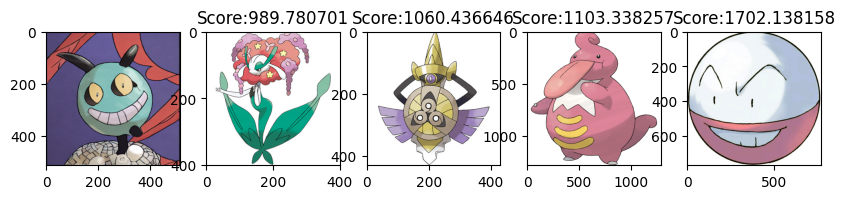

a bunch of balls with faces drawn on them


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 60.08it/s]


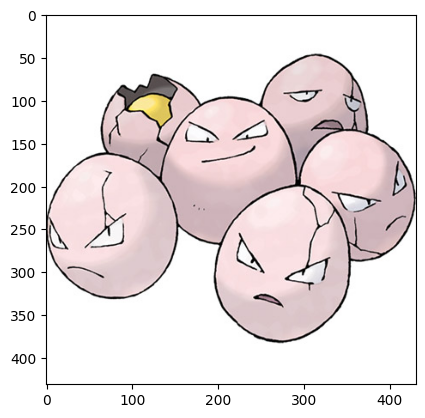

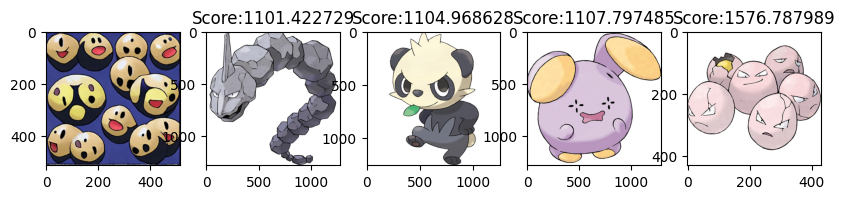

a cartoon character with a potted plant on his head


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 57.00it/s]


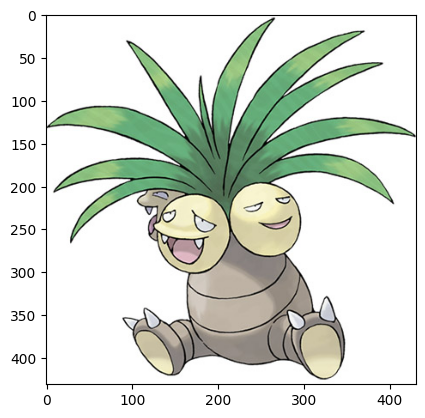

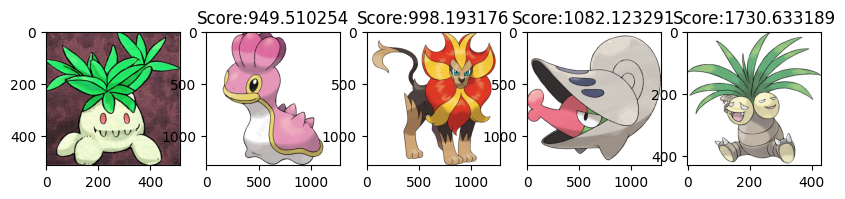

a drawing of a pokemon stuffed animal


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 59.61it/s]


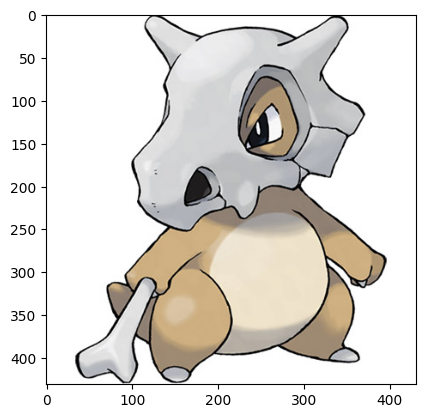

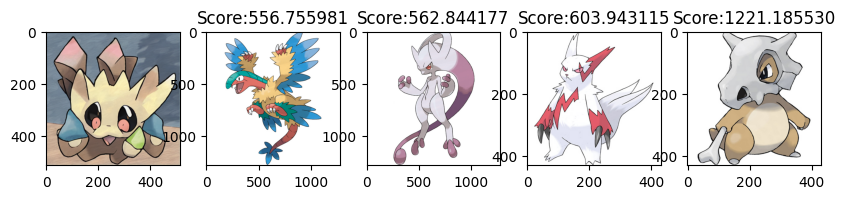

a picture of a cartoon character with a sword


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 55.81it/s]


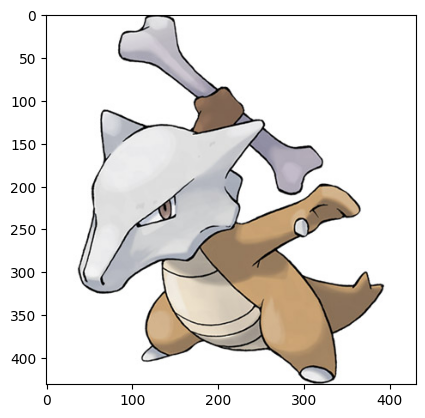

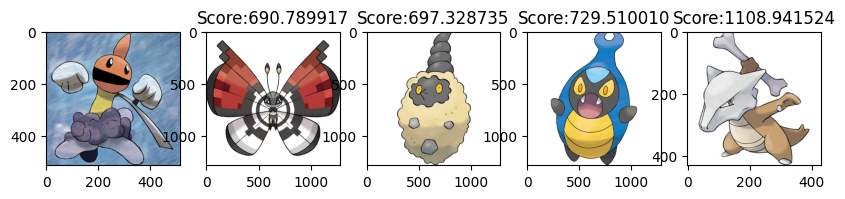

a drawing of a cartoon character doing a kick


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 17.41it/s]
Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


All images were filtered
a drawing of a girl with a boxing glove


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 57.94it/s]


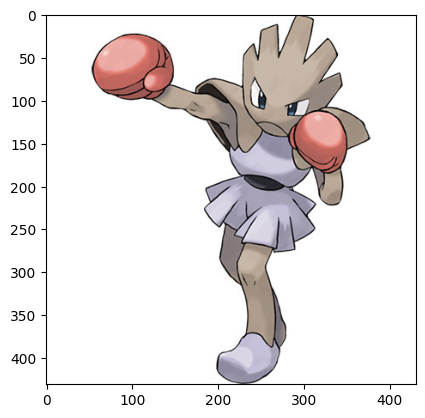

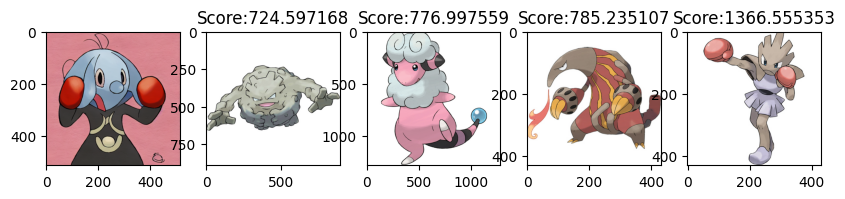

a picture of a pink and yellow pokemon figure


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 54.25it/s]


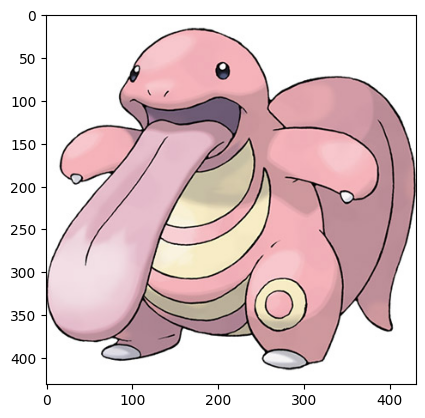

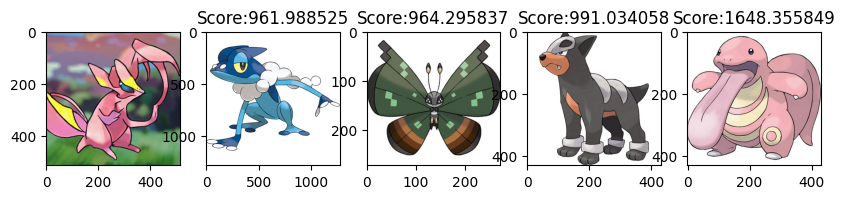

In [10]:
for i, (pokeimage, poketext) in enumerate(zip(*pokedata['train'][:n_items].values())):
    print(poketext)

    pokepredimages = pipe(poketext, num_inference_steps=num_inference_steps, guidance_scale=guidance_scale).images

    for pokepredimage in pokepredimages:
        if not is_all_black(pokepredimage): 
            break
    else:
        print("All images were filtered")
        continue

    plt.imshow(pokeimage)
    distances, images = Imi.search_image_with_plot(pokepredimage, index_image = i, top_k=3, figsize=(10,5))
    
    if i == 10: 
     break